<a href="https://colab.research.google.com/github/Aayushktyagi/DeepLearning_Resources/blob/master/Svm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
Supervised learning algorithm

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np
import os
import sys
import time 
import pandas as pd 
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects

   Pregnancies  Glucose  BloodPressure  ...  DiabetesPedigreeFunction  Age  Outcome
0            6      148             72  ...                     0.627   50        1
1            1       85             66  ...                     0.351   31        0
2            8      183             64  ...                     0.672   32        1
3            1       89             66  ...                     0.167   21        0
4            0      137             40  ...                     2.288   33        1

[5 rows x 9 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-n

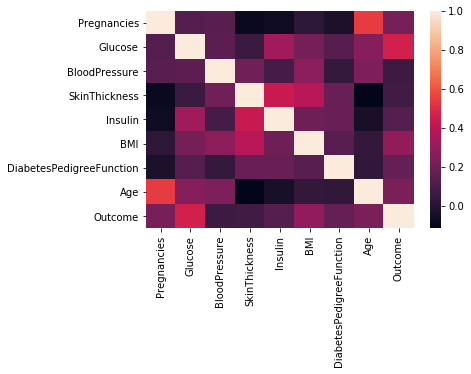

In [25]:
diabetes = pd.read_csv("drive/My Drive/Dataset/diabetes.csv")
print(diabetes.head())
print(diabetes.info())
print("Diabetes data set dimensions : {}".format(diabetes.shape))
corr = diabetes.corr()
sns.heatmap(corr, xticklabels=corr.columns,yticklabels=corr.columns)
label = diabetes.pop('Outcome')

In [0]:
def data_scatter(x, colors):
    # choose a color palette with seaborn.
    num_classes = len(np.unique(colors))
    palette = np.array(sns.color_palette("hls", num_classes))

    # create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # add the labels for each digit corresponding to the label
    txts = []

    for i in range(num_classes):

        # Position of each label at median of data points.

        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts

In [0]:
# Data Visualization 
def dim_reduction(dataframe):
    pca = PCA(n_components = 5)
    pca_result_5 = pca.fit_transform(dataframe)
    RS = 123
    start_time = time.time()
    data_tsne = TSNE(random_state=RS).fit_transform(pca_result_5)
    data_scatter(data_tsne , label)
    print("Time taken:{}".format(time.time() - start_time))

Time taken:4.916785955429077


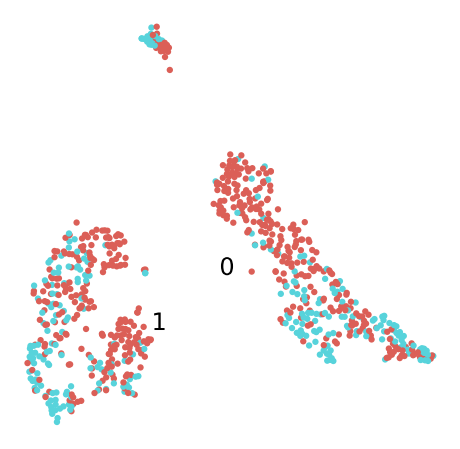

In [17]:
dim_reduction(diabetes)

In [22]:
#Test train Split
X_train, X_test , Y_train , Y_test = train_test_split(diabetes, label ,test_size = 0.2)
print("trainig data:{}".format(len(X_train)))
print("Testing data:{}".format(len(X_test)))

trainig data:614
Testing data:154


In [0]:
params_grid = [{'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

In [24]:
# Performing CV to tune parameters for best SVM fit 
svm_model = GridSearchCV(SVC(), params_grid, cv=5)
svm_model.fit(X_train, Y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [0]:
final_model = svm_model
Y_pred = final_model.predict(X_test)
Y_pred_label = Y_pred

In [27]:
print(confusion_matrix(Y_test,Y_pred_label))
print("\n")
print(classification_report(Y_test,Y_pred_label))

print("Training set score for SVM: %f" % final_model.score(X_train , Y_train))
print("Testing  set score for SVM: %f" % final_model.score(X_test , Y_test ))

svm_model.score

[[90 17]
 [17 30]]


              precision    recall  f1-score   support

           0       0.84      0.84      0.84       107
           1       0.64      0.64      0.64        47

    accuracy                           0.78       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.78      0.78      0.78       154

Training set score for SVM: 0.765472
Testing  set score for SVM: 0.779221


<bound method BaseSearchCV.score of GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)>